<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeProfundo/blob/master/notebooks/2a_convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from torchvision.datasets import MNIST

## Se hace el experimento cargando MNIST

In [2]:
ds = MNIST(
    # directorio de datos
    root='../data', 
    # subconjunto de entrenamiento
    train=True, 
    # convertir la imagen a ndarray
    transform=np.array, 
    # descargar el conjunto
    download=False
)

In [3]:
lab = [ds[i][1]for i in range(len(ds))]
labels = [j for j,v in enumerate(lab) if v < 2]

In [4]:
dat = [0 for i in range(len(labels))]
for r,i in enumerate(labels):
    dat[r] = ds[i]

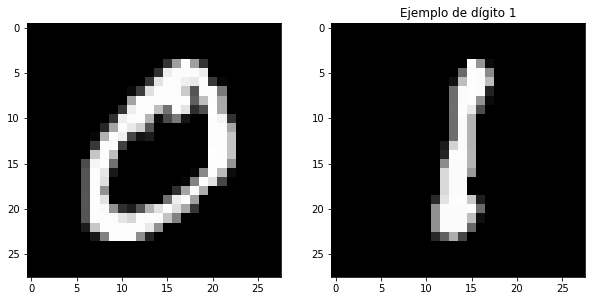

In [5]:
Cero,cero = dat[0]
Uno,uno = dat[100]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Cero, cmap = 'gray') 
plt.title('Ejemplo de dígito 0')
axs[1].imshow(Uno, cmap = 'gray') 
plt.title('Ejemplo de dígito 1')
plt.show() 

## Carga conjunto de datos de dígitos 
Vamos a cargar el conjunto de datos de dígitos usando la biblioteca `scikit-learn`:

In [6]:
# digits = load_digits() 
# zeros_ones = digits.target < 2
# data = digits.images[zeros_ones]
# labels = digits.target[zeros_ones]

Es conveniente normalizar los valores de las imágenes para que estén en el mismo rango ($0-1$). 

In [7]:
# data = data / data.max()

Este conjuntos de datos está compuesto por imágenes de $8 \times 8$ de los dígitos $0-9$. Visualicemos 2 instancias de los dígitos $0$ y $1$:

In [8]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].imshow(Cero, cmap = 'gray') 
# plt.title('Ejemplo de dígito 0')
# axs[1].imshow(Uno, cmap = 'gray') 
# plt.title('Ejemplo de dígito 1')
# plt.show() 

## Convolución y correlación cruzada
Ahora consideremos las operación de convolución entre una imagen $I$ y un filtro $W$, la cual está definida por

$$
A_{i,j} = (\mathbf{I} * \mathbf{W})_{i,j} = \sum_m \sum_n I_{m, n} W_{i - m, j - n}
$$

La convolución es commutativa, por lo tanto 

$$
A_{i,j} = (\mathbf{W} * \mathbf{I})_{i,j} = \sum_m \sum_n I_{i - m, j - n} W_{m,n}
$$

En lugar de la convolución, frecuentemente se ocupa la operación de correlación cruzada para llevar a cabo las capas convolucionales. Esta operación es similar a la convolución pero sin voltear el filtro (por lo que pierde la propiedad de conmutatividad) y está dada por

$$
A_{i,j} = (\mathbf{W} * \mathbf{I})_{i,j} = \sum_m \sum_n I_{i + m, j + n} W_{m,n} 
$$

El resultado de estas operaciones es el mapa de activaciones $A(i,j)$. 



In [9]:
def conv2d(I, W, b, stride = 1):
    h_s = int(np.ceil(float(I.shape[0] - W.shape[0]) / float(stride) + 1))
    w_s = int(np.ceil(float(I.shape[1] - W.shape[1]) / float(stride) + 1))
    a = np.zeros((h_s, w_s))
    for i in range(h_s):
        for j in range(w_s):
            I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]
            a[i, j] = (I_m * W).sum()
    return a

## Filtro

Definamos un filtro de $3 \times 3$ que detecte bordes en cierta orientación:

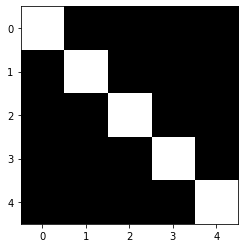

In [10]:
filter1 = np.zeros((5,5))
np.fill_diagonal(filter1, np.array([1, 1, 1, 1, 1]))
plt.imshow(filter1, cmap = 'gray') 
plt.show()

Aplicando las operaciones de correlación cruzada y convolución de una imagen del dígito $0$ con dicho filtro y al revés obtenemos:

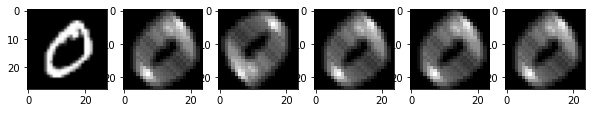

In [11]:
from scipy import signal
ccorr = signal.correlate2d(Cero, filter1, mode = 'valid')
ccorr2 = signal.correlate2d(filter1, Cero, mode = 'valid') 
conv = signal.convolve2d(Cero, filter1, mode = 'valid') 
conv2 = signal.convolve2d(filter1, Cero, mode = 'valid') 
a = conv2d(Cero, filter1, 0)
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(Cero, cmap = 'gray') 
axs[1].imshow(ccorr, cmap = 'gray') 
axs[2].imshow(ccorr2, cmap = 'gray') 
axs[3].imshow(conv, cmap = 'gray') 
axs[4].imshow(conv2, cmap = 'gray') 
axs[5].imshow(a, cmap = 'gray') 
plt.show()

Observa que el resultado de la correlación cruzada de la imagen con el filtro es diferente al del filtro con la imagen. En contraste, la convolución es conmutativa y produce el mismo resultado en ambos casos.

Haciendo lo mismo para una imagen del dígito $1$:

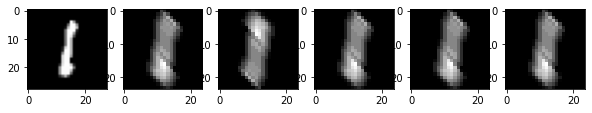

In [12]:
corr = signal.correlate2d(Uno, filter1, mode = 'valid')
corr2 = signal.correlate2d(filter1, Uno, mode = 'valid') 
conv = signal.convolve2d(Uno, filter1, mode = 'valid') 
conv2 = signal.convolve2d(filter1, Uno, mode = 'valid') 
a = conv2d(Uno, filter1, 0)
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(Uno, cmap = 'gray') 
axs[1].imshow(corr, cmap = 'gray') 
axs[2].imshow(corr2, cmap = 'gray') 
axs[3].imshow(conv, cmap = 'gray') 
axs[4].imshow(conv2, cmap = 'gray') 
axs[5].imshow(a, cmap = 'gray') 
plt.show()

Podemos definir otros filtros de $3\times 3$:

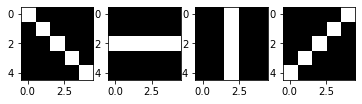

In [13]:
filters = np.zeros((4, 5, 5))
filters[0, :, :] = filter1
filters[1, 2, :] = 1
filters[2, :, 2] = 1
filters[3, :, :] = filter1[::-1]

b = np.zeros(4)

plt.subplot(1,4,1)
plt.imshow(filters[0], cmap = 'gray') 
plt.subplot(1,4,2)
plt.imshow(filters[1], cmap = 'gray') 
plt.subplot(1,4,3)
plt.imshow(filters[2], cmap = 'gray') 
plt.subplot(1,4,4)
plt.imshow(filters[3], cmap = 'gray') 
plt.show()

Para aplicar la operación de convolución con cada uno de estos filtros definimos la siguiente función:

In [14]:
def multi_conv2d(I, W, b, stride = 1):
    k = W.shape[0]
    activations = []
    for i in range(k):
        activations.append(conv2d(I, W[i], b[i], stride = 1)) 

    return np.array(activations)

Evaluamos esta función con cuatro distintos filtros para nuestras dos imágenes, obteniendo cuatro mapas de activaciones por cada imagen.

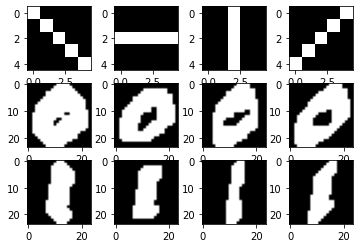

In [15]:
activations_0 = np.tanh(multi_conv2d(Cero, filters, b))
activations_1 = np.tanh(multi_conv2d(Uno, filters, b))

for i in range(4):
    plt.subplot(3,4,i + 1)
    plt.imshow(filters[i], cmap = 'gray')
    plt.subplot(3,4,i + 5)
    plt.imshow(activations_0[i], cmap = 'gray')
    plt.subplot(3,4,i + 9)
    plt.imshow(activations_1[i], cmap = 'gray')

Ahora definimos funciones para realizar un submuestreo máximo a un conjunto de mapas de características:

In [16]:
def submuestreo_maximo(activations, block = (2,2)):
    H, W = activations.shape
    H_s = H // block[0]
    W_s = W // block[1]

    sub_a = np.zeros((H_s,W_s))
    max_x = activations.reshape((H * W_s, block[1])).max(axis = 1)
    sub_a = max_x.T.reshape((W_s, block[0], H_s)).max(axis = 1)

    return sub_a

def multi_submuestreo_maximo(activations, block = (2,2)):
    k = activations.shape[0]
    sub_a = []
    for i in range(k):
        sub_a.append(submuestreo_maximo(activations[i]))

    return np.array(sub_a)

Aplicamos el submuestreo a nuestros mapas de activaciones

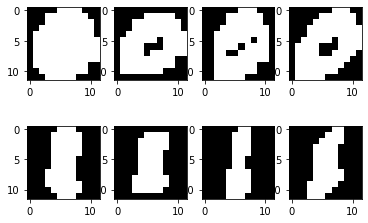

In [17]:
sub_a0 = multi_submuestreo_maximo(activations_0)
sub_a1 = multi_submuestreo_maximo(activations_1)
for i in range(4):  

  plt.subplot(2,4,i + 1)
  plt.imshow(sub_a0[i], vmin = 0, cmap = 'gray')
  plt.subplot(2,4,i + 5)
  plt.imshow(sub_a1[i], vmin = 0, cmap = 'gray')